## PROYECTO 2


## Importación Librerías

In [1]:
import sys
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")
import pandas as pd



## Importar Datos

In [2]:
# Lee el archivo Excel
df = pd.read_excel('C:\\Users\\ASUS\\Documents\\Uniandes\\8vo semestre\\Analítica\\Proyecto 2\\DatosProy2FINAL.xlsx')

# Muestra las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df.head())

   ID  Saldo_Limite  Sexo  Edad  Cuenta_Sept  Cuenta_Ago  Cuenta_Jul  \
0   1         20000     0    24         3913        3102         689   
1   2        120000     0    26         2682        1725        2682   
2   3         90000     0    34        29239       14027       13559   
3   4         50000     0    37        46990       48233       49291   
4   5         50000     1    57         8617        5670       35835   

   Cuenta_Jun  Cuenta_May  Cuenta_Abr  ...  Status_Abr_-1  Status_Abr_0  \
0           0           0           0  ...              0             0   
1        3272        3455        3261  ...              0             0   
2       14331       14948       15549  ...              0             1   
3       28314       28959       29547  ...              0             1   
4       20940       19146       19131  ...              0             1   

   Status_Abr_1  Status_Abr_2  Status_Abr_3  Status_Abr_4  Status_Abr_5  \
0             0             0            

## Separación y Entrenamiento

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
X=df.drop(['ID', 'Y_default_payment_next_month', 'EsDefault'], axis=1)	
X.shape
y = df[['Y_default_payment_next_month']]  # Suponiendo que 'etiqueta_columna' es el nombre de la columna de etiquetas

# Divide los datos en conjuntos de entrenamiento, validación y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)



# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
y_train_norm = scaler.fit_transform(y_train)

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
y_valid_norm = scaler.fit_transform(y_valid)

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
X_train_norm = scaler.fit_transform(X_train)

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
X_valid_norm = scaler.fit_transform(X_valid)



## CAPAS y MODELO

In [22]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(82),
        tf.keras.layers.Dense(72, activation="relu"),
        tf.keras.layers.Dense(62, activation="relu"),
        tf.keras.layers.Dense(52, activation="relu"),
        tf.keras.layers.Dense(42, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(22, activation="relu"),
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(2, activation="sigmoid")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

Creemos un optimizador de gradiente estocástico con tasa de aprendizaje 0.001

In [23]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

Ejecutemos el modelo con el optimizador definido

In [24]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/30
1052/1052 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 2/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 3/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 4/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 5/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 6/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 7/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 8/30
1052/1052 [============

Creemos un optimizador de gradiente estocástico con tasa de aprendizaje 0.001 y momento 0.9 y ejecutamos

In [25]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_momentum = build_and_train_model(optimizer)

Epoch 1/30
1052/1052 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5012 - val_loss: nan - val_accuracy: 0.4932
Epoch 2/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 3/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 4/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 5/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 6/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 7/30
1052/1052 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5010 - val_loss: nan - val_accuracy: 0.4932
Epoch 8/30
1052/1052 [============

Optimizador adaptativo AdaGrad

In [26]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
history_adagrad = build_and_train_model(optimizer)

Epoch 1/30
1052/1052 [==============================] - 3s 2ms/step - loss: 8.3671 - accuracy: 0.5711 - val_loss: 6.8394 - val_accuracy: 0.5608
Epoch 2/30
1052/1052 [==============================] - 2s 2ms/step - loss: 4.5550 - accuracy: 0.5668 - val_loss: 4.1436 - val_accuracy: 0.5707
Epoch 3/30
1052/1052 [==============================] - 2s 2ms/step - loss: 3.6524 - accuracy: 0.5664 - val_loss: 3.7594 - val_accuracy: 0.5574
Epoch 4/30
1052/1052 [==============================] - 3s 2ms/step - loss: 3.2179 - accuracy: 0.5679 - val_loss: 3.8096 - val_accuracy: 0.5501
Epoch 5/30
1052/1052 [==============================] - 2s 2ms/step - loss: 2.9559 - accuracy: 0.5697 - val_loss: 3.3045 - val_accuracy: 0.5633
Epoch 6/30
1052/1052 [==============================] - 2s 2ms/step - loss: 2.7806 - accuracy: 0.5695 - val_loss: 3.3486 - val_accuracy: 0.5496
Epoch 7/30
1052/1052 [==============================] - 2s 2ms/step - loss: 2.6606 - accuracy: 0.5680 - val_loss: 3.1182 - val_accuracy:

Optimizador ADAM

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)
history_adam = build_and_train_model(optimizer)

Epoch 1/30
1052/1052 [==============================] - 4s 3ms/step - loss: 26.3637 - accuracy: 0.5326 - val_loss: 8.8148 - val_accuracy: 0.5619
Epoch 2/30
1052/1052 [==============================] - 2s 2ms/step - loss: 4.4479 - accuracy: 0.5484 - val_loss: 1.3820 - val_accuracy: 0.5627
Epoch 3/30
1052/1052 [==============================] - 2s 2ms/step - loss: 1.3383 - accuracy: 0.5307 - val_loss: 1.2318 - val_accuracy: 0.5314
Epoch 4/30
1052/1052 [==============================] - 3s 2ms/step - loss: 1.2116 - accuracy: 0.5468 - val_loss: 0.8382 - val_accuracy: 0.5756
Epoch 5/30
1052/1052 [==============================] - 2s 2ms/step - loss: 0.8933 - accuracy: 0.5703 - val_loss: 0.7288 - val_accuracy: 0.4926
Epoch 6/30
1052/1052 [==============================] - 2s 2ms/step - loss: 0.9330 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.5068
Epoch 7/30
1052/1052 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy

Evaluación de desempeño

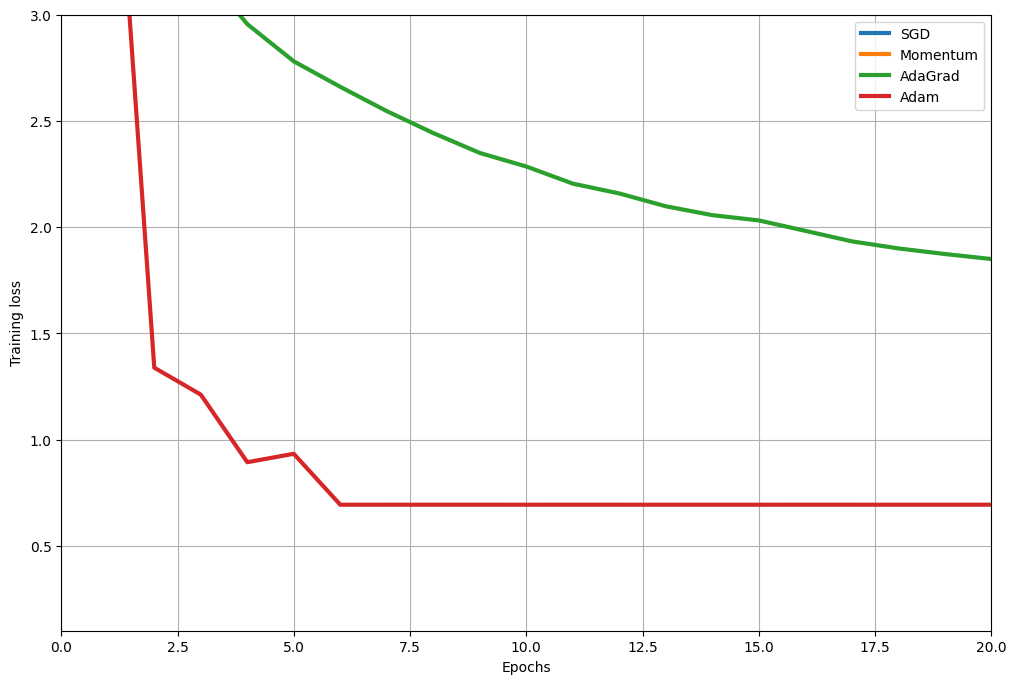

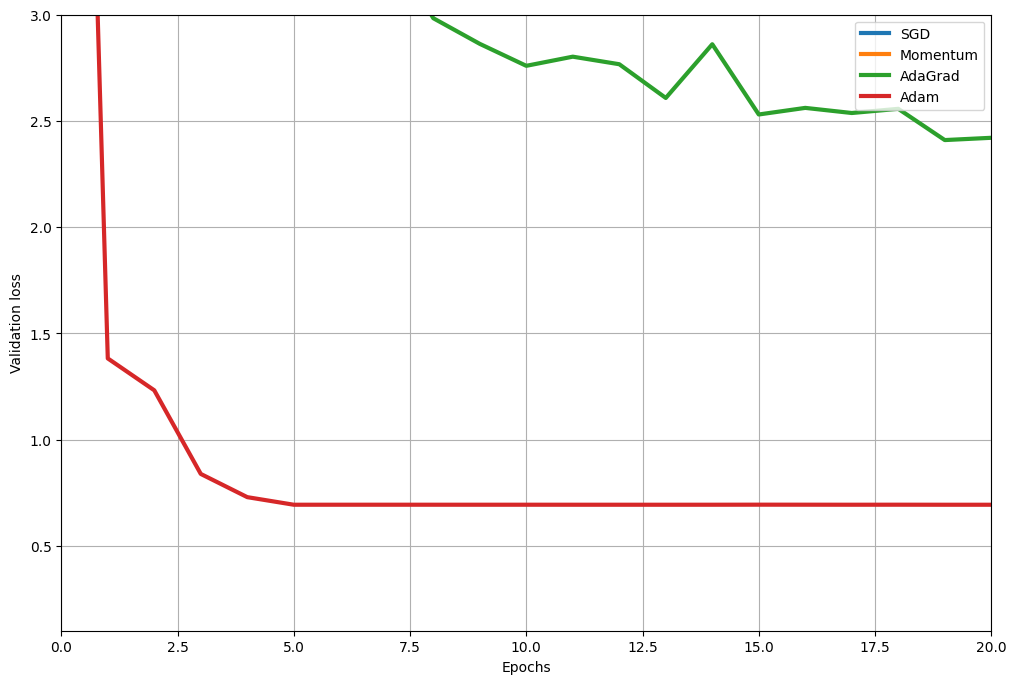

In [28]:
import matplotlib.pyplot as plt
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum AdaGrad Adam"
    for history, opt_name in zip((history_sgd, history_momentum,
                                  history_adagrad, history_adam,
                                 ),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper right")
    plt.axis([0, 20, 0.1, 3])
    plt.show()

## Guardar modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(82))
model.add(tf.keras.layers.Dense(72, activation="relu"))
model.add(tf.keras.layers.Dense(62, activation="relu"))
model.add(tf.keras.layers.Dense(52, activation="relu"))
model.add(tf.keras.layers.Dense(42, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(22, activation="relu"))
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

model.save('modelo_P2.keras')




